# Школа глубокого обучения

<a href="https://mipt.ru/science/labs/laboratoriya-neyronnykh-sistem-i-glubokogo-obucheniya/"><img align="right" src="https://avatars1.githubusercontent.com/u/29918795?v=4&s=200" alt="DeepHackLab" style="position:relative;top:-40px;right:10px;height:100px;" /></a>



### Физтех-Школа Прикладной математики и информатики МФТИ 
### Лаборатория нейронных сетей и глубокого обучения (DeepHackLab)

# Перцептрон и его друзья

In [1]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as p3
import pandas as pd
import numpy as np
import seaborn as sns

import random
import time

%matplotlib inline

## Перцептрон: intro
Попробуем разобраться с моделью перцептрона.
Надеюсь, что это будет простое задание. 

![title](img/perceptron.png)


    Сегодня мы будем пытаться научиться отличать яблоки от груш. Датасет состоит из трех признаков: желтизна, симметричность плода и собственно сама целевая переменная(0 - яблоки, 1 - груши)

In [2]:
data = pd.read_csv("./data/apples_pears.csv")

In [3]:
pears = data["target"] == 1
apples = data["target"] == 0
data.head()

,yellowness,symmetry,target
0,0.779427,0.257305,1.0
1,0.777005,0.015915,1.0
2,0.977092,0.304210,1.0
3,0.043032,0.140899,0.0
4,0.760433,0.193123,1.0


Так данные то у нас есть, но неплохо бы понимать, что они из себя представляют.

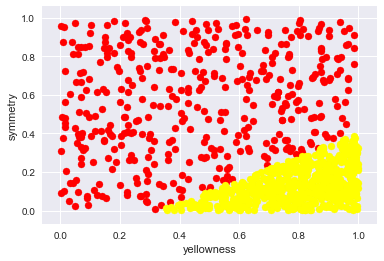

In [4]:
plt.scatter(data[apples].yellowness, data[apples].symmetry, color = "red")
plt.scatter(data[pears].yellowness, data[pears].symmetry, color = "yellow")
plt.xlabel("yellowness")
plt.ylabel("symmetry")
plt.show()

In [6]:
class Perceptron:
    def __init__(self, w, b):
        """
        :param w: вектор весов
        :param b: bias
        """
        self.w = w
        self.b = b
        
    def _activate(self, x):
        """
        Пороговая активационная функция перцептрона
        """
        return x > 0
        
    def forward_pass(self, input_matrix):
        """
        Метод рассчитывает ответ перцептрона при предъявлении набора примеров
        :param: input_matrix - матрица примеров размера (n, m), каждая строка - отдельный пример,
        :return: вектор размера (n, 1) с ответами перцептрона
        """
        
        return self._activate(input_matrix.dot(self.w) + self.b).astype(int)
    
    # Чего-то не хватает

Ну сейчас мы сделали модель, о которой говорили раньше. Попробуем теперь сделать упражнение прямо в ней. 

**Упражнение**: Возьмите вектор  \begin{align}
    \vec{w} &= \begin{bmatrix}
           -1,5 \\
           1 \\
           1
         \end{bmatrix}
  \end{align}
  
Напоминаю, что bias передается в конструктор класса( тут это первая координата)

In [8]:
input_matrix = np.array([[0,0], [0,1], [1,0], [1,1]])

In [9]:
per = Perceptron([1, 1], -1.5)

In [10]:
per.forward_pass(input_matrix).reshape(-1,1)

array([[0],
       [0],
       [0],
       [1]])

### Градиентный спуск

Рассмотрим работу этого алгоритма на простом примере.


In [ ]:
f = lambda x: x**3-2*x**2+2

In [ ]:
def f_prime(x):
    pass

In [ ]:
x = np.linspace(-1,2.5,1000)
plt.plot(x,f(x))
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.show()

In [ ]:
x_old = 0
x_new = 2 # Попробуйте различные нулевые значения для нашего алгоритма
lr = 0.1  # темп
precision = 0.001

x_history, y_history = [x_new], [f(x_new)]
 
while abs(x_new - x_old) > precision:
    x_old = x_new
    grad = <code>
    x_new = <code>
    x_history.append(x_new)
    y_history.append(f(x_new))
print("Предполагаемый минимум", x_new)

![title](img/searh_min.png)

In [ ]:
plt.figure(figsize=[10, 8])
plt.plot(x, f(x), c="b")
plt.plot(x_history, y_history,c="r", alpha=0.6)
plt.scatter(x_history, y_history,c="g")
plt.xlim([-1,2.5])
plt.ylim([0,3])
plt.title("Градиентный спуск")
plt.show()

In [ ]:
plt.figure(figsize=[8, 6])
plt.scatter(x_history,y_history,c="g")
plt.plot(x_history, y_history,c="r")
plt.plot(x,f(x), c="b", alpha=0.6)
plt.xlim([1.2,2.1])
plt.ylim([0,3])
plt.title("Приблизимся")
plt.show()

### Друзья перцептрона

Перцептрон это конечно круто, но это просто линейный нейрон, со определенной активацией. А какие же еще есть нейроны.

#### Сигмоидальный

$$\sigma(x) = \frac{1}{1+\exp{-x}}$$

![Sigma](img/sigmoid.png)


In [ ]:
def sigmoid(x):
    """сигмоидальная функция"""
    pass

In [ ]:
def sigmoid_prime(x):
    """Производная сигмоиды"""
    pass

#### Гиперболический тангенс
$th(x)=\frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$

![Sigma](img/tanh.png)


In [ ]:
def tanh(x):
    pass

#### RELU
$f(x) =  max (0,x) $


In [ ]:
def relu(x):
    pass

Потесть сам. Задание: нарисовать графики этих функций

In [ ]:
start = -2
stop  = 2
step  = 0.2


print('Различные активационные функции')
print(' ==================================')
print(' |  x   | sigmoid |  tanh  | relu |')
print(' ==================================')
for i in np.arange(start, stop, step):
    print(' | {.01f} | {.4f} | {.3f} | {.01f} |'.format(i, sigmoid(i), tanh(i), relu(i)))
print(' ==================================')

В скором времене вы обязательно поймете зачем нам куча этих активаций. И когда какую использовать.


Так, мы написали очень не нужную вещь. Надо бы превратить теперь этот перцептрон с определенными весами во что-то, что действительно будет классифицировать объекты.
![title](img/rozen_meme.webp)


## Обучение перцептрона

Реализуйте методы grad_step и gradient_descent на основании полученных знаний. Тем самым мы дадим нашему перцептрону возможность адоптироваться.

        #############################
        # Ваш перцептрон появится ниже  #
        ############################

In [ ]:
class Perceptron:
    def __init__(self, w, b):
        """
        :param w: вектор весов
        :param b: bias
        """
        self.w = w
        self.b = b
        
    def _activate(self, x):
        pass
    
    def forward_pass(self, input_vector):
        """
        Метод рассчитывает ответ перцептрона при предъявлении набора примеров
        :param: input_matrix - матрица примеров размера (n, m), каждая строка - отдельный пример,
        :return: вектор размера (n, 1) с ответами перцептрона
        """

        ############
        # Ваш код  #
        ############
        pass
    
    def grad_step(self, example, y):
        """
        Обновляет значения весов перцептрона в соответствии с этим примером
        :example: вектор активации входов (m, 1)
        :y: истинные значения
        :return: размер ошибки, которая случилась на этом примере до изменения весов (0 или 1)
        """
        pass
    
    def train(self, input_matrix, y, max_steps=1e8):
        """
        Спускаемся в минимум
        :input_matrix: матрица входов размера (n, m),
        :y: вектор правильных ответов размера (n, 1)
        :max_steps: максимальное количество шагов.
        """
        i = 0
        errors = 1
        while errors and i < max_steps:
            i += 1
            errors = 0
            for example, answer in zip(input_matrix, y):
                pass

In [ ]:
def plot_line(coefs):
    """
    рисует разделяющую прямую, соответствующую весам, переданным в coefs = (weights, bias), 
    где weights - ndarray формы (2, 1), bias - число
    """
    w, bias = coefs
    a, b = - w[0][0] / w[1][0], - bias / w[1][0]
    xx = np.linspace(*plt.xlim())
    line.set_data(xx, a*xx + b)

In [ ]:
W = np.random.rand(2,4)
perceptron_for_weights_line = Perceptron(W, 2) 

In [ ]:
def step_by_step_errors(p, input_matrix, y, max_steps=1e6):
    """
    обучает перцептрон последовательно на каждой строчке входных данных, 
    на каждом шаге обучения запоминает количество неправильно классифицированных примеров
    и возвращает список из этих количеств
    """
    def count_errors():
        return np.abs(p.vector_pass(input_matrix).astype(np.int) - y).sum()
    errors_list = [count_errors()]
    i = 0
    errors = 1
    while errors and i < max_steps:
        i += 1
        errors = 0
        for example, answer in zip(input_matrix, y):
            example = example.reshape((1,example.size))
            error = p.grad_step(example, answer)
            errors += error
            errors_list.append(count_errors())
    return errors_list

In [ ]:
data.head()

In [ ]:
target = data['target']
W = np.random.random((2,1))
plt.figure(figsize=[10, 8])
perceptron_for_misclassification = Perceptron(W, 1)
errors_list = step_by_step_errors(perceptron_for_misclassification, \
                                  input_matrix=data.iloc[:,:2].values, y=target.values, max_steps=10)
plt.plot(errors_list);
plt.ylabel("Accuracy")
plt.xlabel("Steps");

In [ ]:
def get_weights_vector(perceptron):
    """возвращает вектор из всех весов перцептрона, включая смещение"""
    return np.array(list(perceptron.w.ravel()) + [perceptron.b])

In [ ]:
def step_by_step_distances(p, ideal, input_matrix, y, max_steps=1e6):
    """обучает перцептрон p и записывает каждое изменение расстояния от текущих весов до ideal"""
    distances = [np.linalg.norm(get_weights_vector(p) - ideal)]
    i = 0
    errors = 1
    while errors and i < max_steps:
        i += 1
        errors = 0
        for example, answer in zip(input_matrix, y):
            example = example.reshape((example.size, 1))
            
            error = p.grad_step(example, answer)
            errors += error
            if error:
                distances.append(np.linalg.norm(get_weights_vector(p) - ideal))
    return distances

In [ ]:
np.random.seed(42)
init_weights = np.random.random_sample(3)
w, b = init_weights[:-1].reshape((2, 1)), init_weights[-1]
ideal_p = Perceptron(w.copy(), b.copy())
ideal_p.gradient_descent(data.iloc[:, :2].values, data['target'].values)
ideal_weights = get_weights_vector(ideal_p)

new_p = Perceptron(w.copy(), b.copy())
distances = step_by_step_distances(new_p, ideal_weights, data.iloc[:, :2].values, data['target'].values)

In [ ]:
plt.xlabel("Number of weight updates")
plt.title("Distance between good and current weights")
plt.plot(distances);